In [2]:
# importing all needed functions
import os
import shutil
import json
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from fast_histogram import histogram1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import matplotlib.patches as mpatches
from matplotlib import rc,rcParams
from astropy.table import Table
%matplotlib inline
# %matplotlib notebook
from astropy.io import fits
from numpy import arange
import json
import subprocess
from Calculating_det_angles import estimate_source_angles_detectors #importing ma'ams function
import matplotlib.image as mpimg


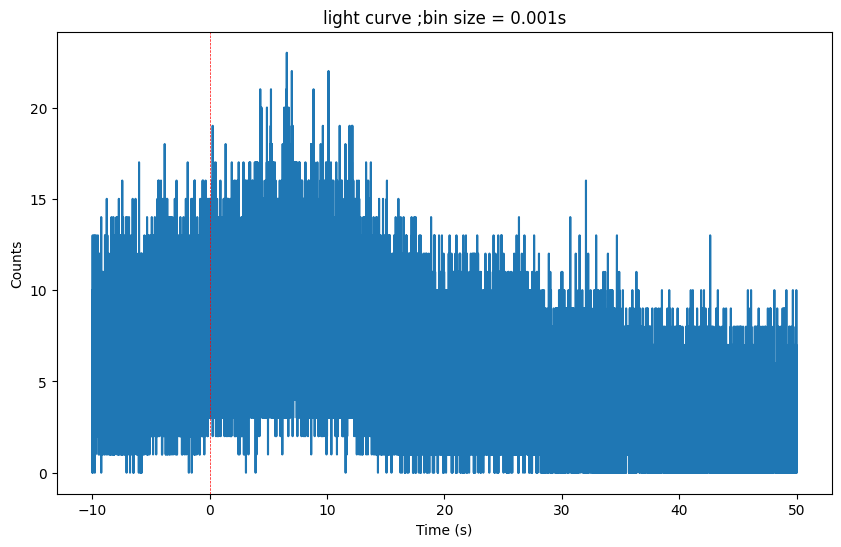

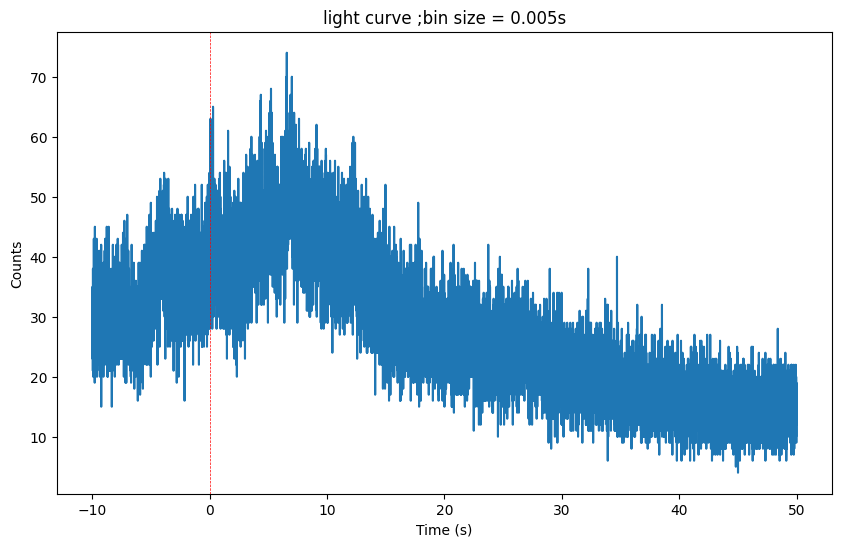

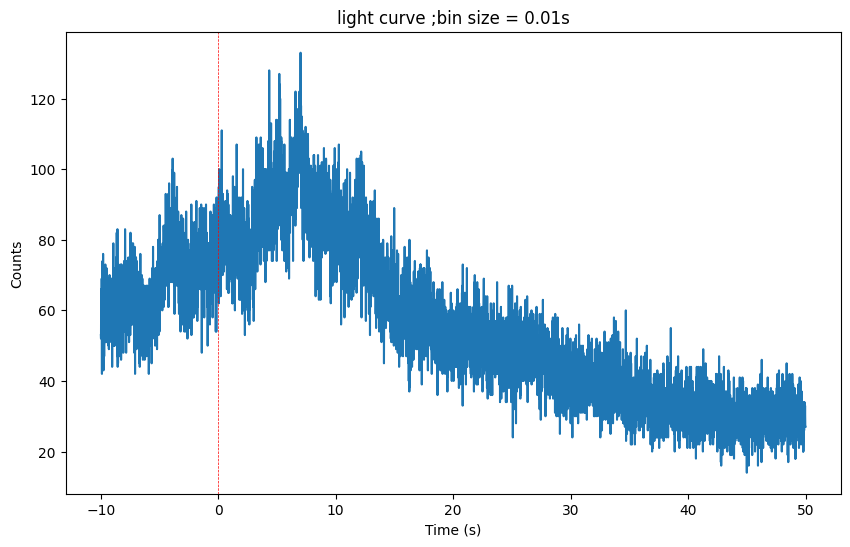

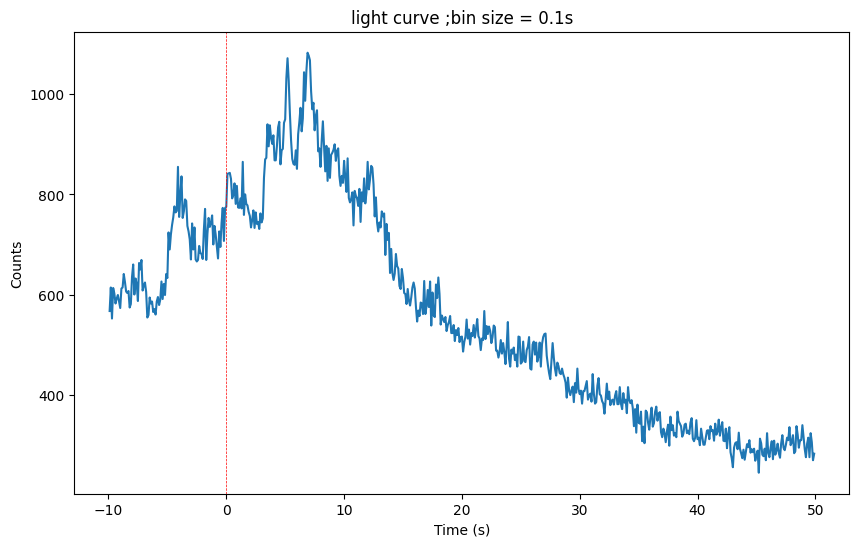

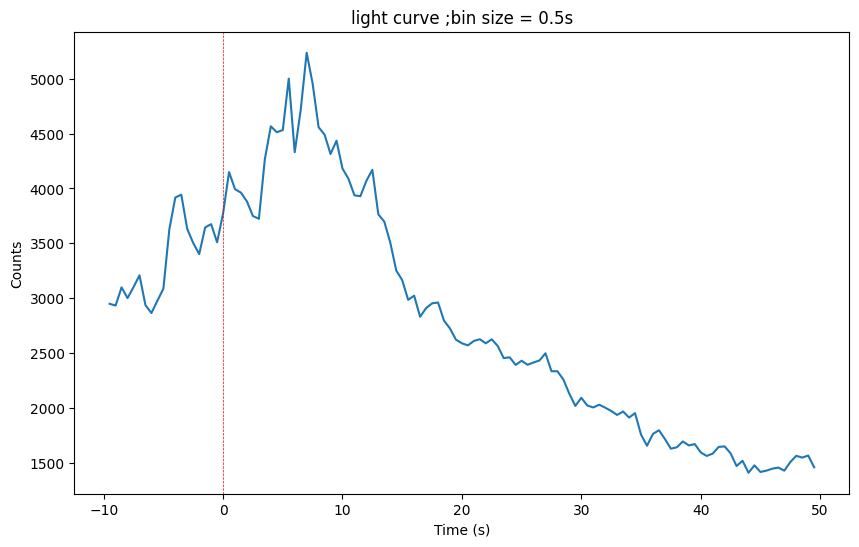

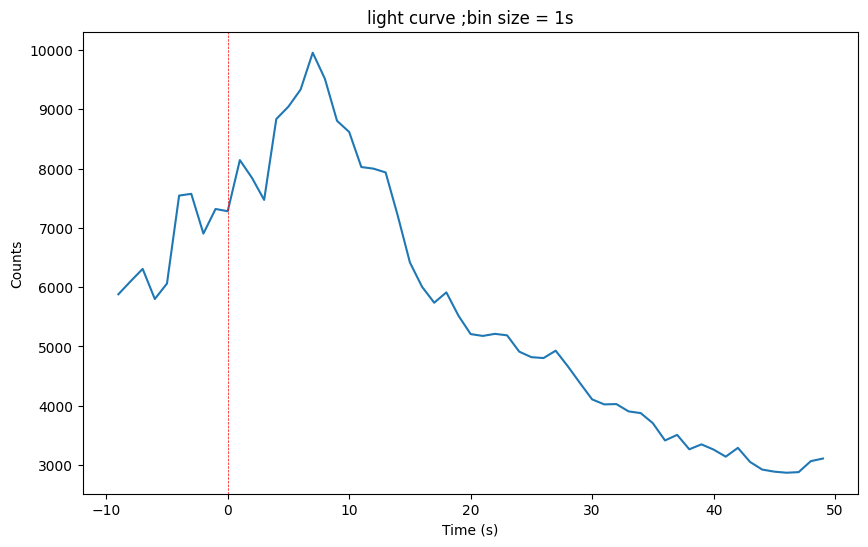

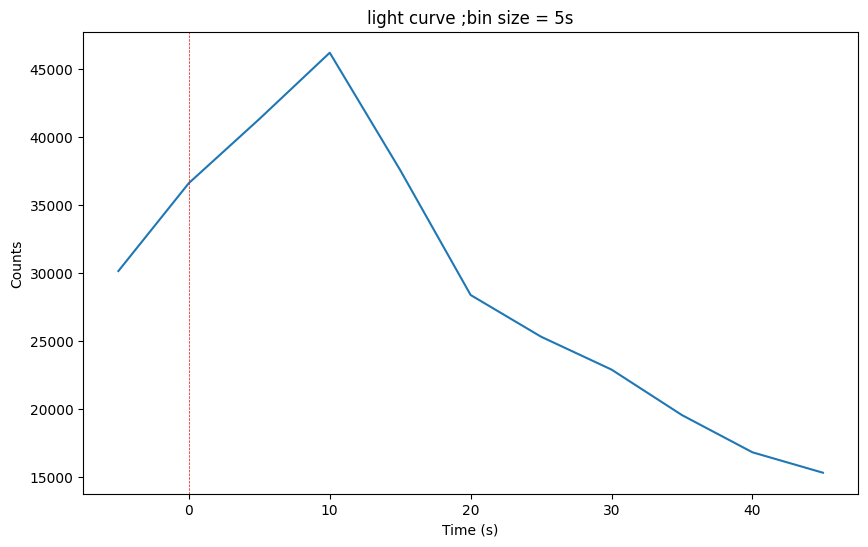

In [6]:
# Plotting the light curve

# fetching data
with fits.open(r"D:\GRB data\500_data_set\SFLARE_bn150309010\current\glg_tte_n4_bn150309010_v00.fit", memmap=True) as hdul:
    # energy_channel_data = hdul[1].data
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime

for i in [0.001,0.005,0.01, 0.1, 0.5, 1, 5]:
    # Define the range and number of bins
    range_min = -10  #min(counts)
    range_max =  50 #max(counts)
    bin_size = i  

    # finding the background
    bg_bin_edges = np.arange(-22, -5, bin_size)
    bg_hist, bg_edges = (np.histogram(counts, bins = bg_bin_edges))
    mean = sum(bg_hist)/len(bg_hist)

    # Create bin edges
    bin_edges = np.arange(range_min, range_max, bin_size)

    # Create the histogram using numpy.histogram
    hist, edges = np.histogram(counts, bins=bin_edges)
        
    # Plot the histogram
    plt.figure(figsize=(10,6))
    plt.plot(edges[1:],hist)
    # plt.hist(counts, bins=bin_edges,histtype='step', edgecolor='k', alpha=0.7, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Counts')
    # bin_size=str(" ;bin size:",float(bin_size))
    plt.title(f'light curve '+f";bin size = {bin_size}s")

    # Add a vertical line at x=0
    plt.axvline(x=0, color='red', linestyle='--',linewidth=0.5)

    # Show the plot
    plt.show()